In [148]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


In [149]:
df = pd.read_json('../../dataset/News_Category_Dataset_v3.json', lines=True)

In [150]:
print(df.shape)

print("Unique categories:",df['category'].nunique())

(209527, 6)
Unique categories: 42


In [151]:
top_10_categories = df['category'].value_counts().nlargest(10).index

In [152]:
top_10_categories

Index(['POLITICS', 'WELLNESS', 'ENTERTAINMENT', 'TRAVEL', 'STYLE & BEAUTY',
       'PARENTING', 'HEALTHY LIVING', 'QUEER VOICES', 'FOOD & DRINK',
       'BUSINESS'],
      dtype='object', name='category')

In [153]:
df = df[df['category'].isin(top_10_categories)]

In [154]:
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])

In [155]:
X = df['headline']  
y = df['category_encoded']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

In [156]:
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [159]:
num_classes = len(np.unique(y_train))
model = models.Sequential([
    layers.InputLayer(input_shape=(X_train_tfidf.shape[1],)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Match the number of classes
])


# Compile the model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.01), 
    loss='sparse_categorical_crossentropy',         
    metrics=['accuracy']                            
)

# Train the model
history = model.fit(X_train_tfidf, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_tfidf, y_test, verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
# Make predictions
y_pred = model.predict(X_test_tfidf)

y_pred_classes = np.argmax(y_pred, axis=1)

Epoch 1/5
2496/2496 ━━━━━━━━━━━━━━━━━━━━ 29s 11ms/step - accuracy: 0.6114 - loss: 1.2216 - val_accuracy: 0.7260 - val_loss: 0.8917
Epoch 2/5
2496/2496 ━━━━━━━━━━━━━━━━━━━━ 32s 13ms/step - accuracy: 0.7756 - loss: 0.7227 - val_accuracy: 0.7316 - val_loss: 0.9121
Epoch 3/5
2496/2496 ━━━━━━━━━━━━━━━━━━━━ 29s 12ms/step - accuracy: 0.8260 - loss: 0.5493 - val_accuracy: 0.7293 - val_loss: 0.9664
Epoch 4/5
2496/2496 ━━━━━━━━━━━━━━━━━━━━ 30s 12ms/step - accuracy: 0.8658 - loss: 0.4234 - val_accuracy: 0.7186 - val_loss: 1.1107
Epoch 5/5
2496/2496 ━━━━━━━━━━━━━━━━━━━━ 30s 12ms/step - accuracy: 0.8928 - loss: 0.3386 - val_accuracy: 0.7178 - val_loss: 1.2341
Test Loss: 1.2422761917114258
Test Accuracy: 0.7110345363616943
780/780 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [162]:
history.history

{'accuracy': [0.6784868836402893,
  0.7692047357559204,
  0.8176251649856567,
  0.8579692840576172,
  0.8869313597679138],
 'loss': [1.038546085357666,
  0.7448979020118713,
  0.5806959271430969,
  0.4464743435382843,
  0.3580751419067383],
 'val_accuracy': [0.7260342836380005,
  0.7315937280654907,
  0.7292897701263428,
  0.7186216711997986,
  0.7177702188491821],
 'val_loss': [0.8917195200920105,
  0.9121403694152832,
  0.9663857221603394,
  1.110668659210205,
  1.234063982963562]}

In [160]:
model.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_105 (Dense)               │ (None, 256)            │     1,280,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,966,176 (15.13 MB)

 Trainable params: 1,322,058 (5.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,644,118 (10.09 MB)

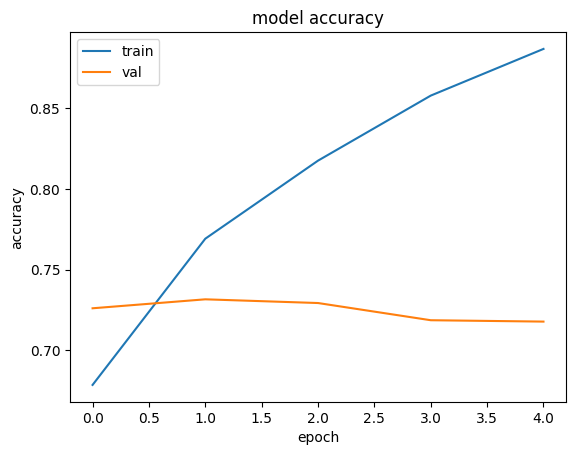

In [163]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()